# 0 .- Carga de librerias

In [151]:
import matplotlib.pyplot as plt
import pandas as pd 
import random
import math
from mpl_toolkits.mplot3d import Axes3D

# 1.- Carga del dataset

In [35]:
data = pd.read_csv("Seed_Data.csv") 
print("Dimensiones (filas, columnas):", data.shape)
data.head()

Dimensiones (filas, columnas): (210, 8)


,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


# 1.1 .- análisis de los datos

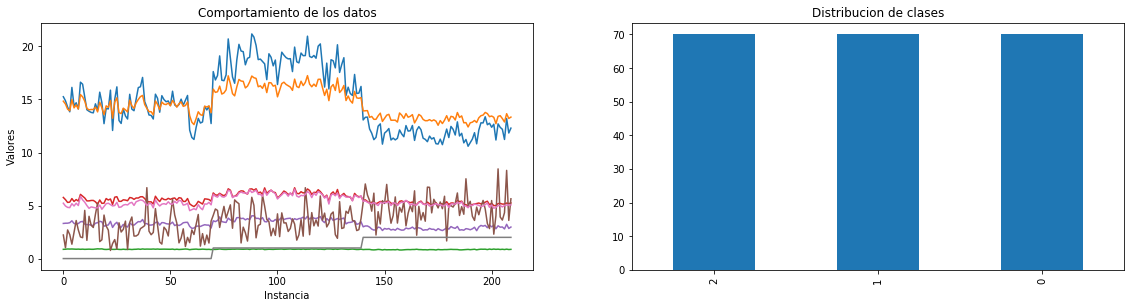

In [38]:
fig = plt.figure(figsize=(30, 10))

plt.subplot2grid((2,3),(0,0))
plt.plot(data)
plt.title("Comportamiento de los datos")
plt.xlabel("Instancia")
plt.ylabel("Valores") 

plt.subplot2grid((2,3),(0,1))
data.target.value_counts().plot(kind='bar', title='Distribucion de clases')

In [39]:
print(data.count())
print("\nNo hay valores nulos")

# se elimina la clase ya que no se utiliza
data = data.drop(columns="target")

A         210
P         210
C         210
LK        210
WK        210
A_Coef    210
LKG       210
target    210
dtype: int64

No hay valores nulos


# 2.- características importantes del dataset

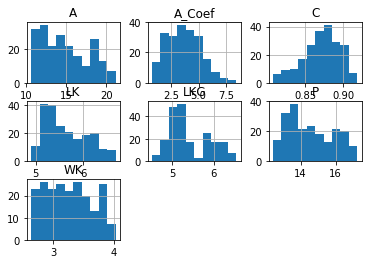

In [45]:
data.hist()
plt.show()

# 3.- matriz de correlación

               A         P         C        LK        WK    A_Coef       LKG
A       1.000000  0.994341  0.608288  0.949985  0.970771 -0.229572  0.863693
P       0.994341  1.000000  0.529244  0.972422  0.944829 -0.217340  0.890784
C       0.608288  0.529244  1.000000  0.367915  0.761635 -0.331471  0.226825
LK      0.949985  0.972422  0.367915  1.000000  0.860415 -0.171562  0.932806
WK      0.970771  0.944829  0.761635  0.860415  1.000000 -0.258037  0.749131
A_Coef -0.229572 -0.217340 -0.331471 -0.171562 -0.258037  1.000000 -0.011079
LKG     0.863693  0.890784  0.226825  0.932806  0.749131 -0.011079  1.000000


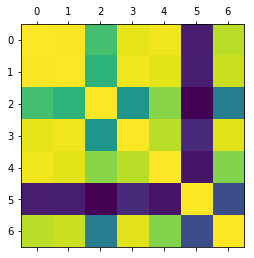

In [30]:
# mapa de calor
plt.matshow(data.corr())
# matriz de correlacion
print(data.corr())

# 4.- Algoritmo de k-means

In [149]:
# calculo de distancias entre el centroide y cada instancia
def distancia_euclidiana(centroide, fila):
    dist = 0
    for i in range(len(centroide)):
        dist += (fila[i] - centroide[i])**2
    return math.sqrt(dist)

# separar los datos por clusters
def clusters(data, G, k):
    clusters = [[]]*k
    for i in range(k):
        for j in range(data.shape[0]):
            if G[i][j] == 1:
                clusters[i].append(data.iloc[j, :].tolist())
    return clusters

# obtener la clase para cada instancia
def labels(data, G, k):
    labels = []
    for i in range(data.shape[0]):
        ind = 0
        for j in range(k):
            if G[j][i] == 1:
                ind = j
        labels.append(ind)
    return labels

# valor por default 2 clusters
def kmeans(data, k=2, max_iters = 1):
    # obtener primeros k centroides aleatorios
    centroides = []
    for i in range(k):
        centroides.append(data.iloc[random.randint(0, data.shape[0]), :].tolist())
    
    D_anterior = []
    for iters in range(max_iters):
        # calculo de distancias entre controide e instancia
        D = [] # matriz de distancias
        for i in range(k):
            dist =[]
            for j in range(data.shape[0]):
                dist.append(distancia_euclidiana(centroides[i], data.iloc[j, :]))
            D.append(dist)

        # calculo de clusters basado en las distancias obtenidas
        G = [[] for i in range(3)] # matriz binaria de clustering
        for i in range(data.shape[0]):
            mini = 99999
            ind = 0
            for j in range(k):
                if D[j][i] < mini:
                    mini = D[j][i]
                    ind = j
            
            for j in range(k):
                if j == ind:
                    G[j].append(1)
                else:
                    G[j].append(0)
            
        # calculo de los nuevos centroides
        for i in range(k):
            c = [0] * data.shape[1] 
            ind = 0
            for j in range(data.shape[0]):
                if G[i][j] == 1:
                    ind += 1
                    for l in range(data.shape[1]):
                        c[l] += data.iloc[j, l]

            for j in range(data.shape[1]):
                c[j] /= ind
    
        if D_anterior == D:
            break
        else:
            D_anterior = D
            
    return clusters(data, G, k), labels(data, G, k)

# run
clusters, labels = kmeans(data, 3)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 2, 2, 1, 1, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0] 210


# 5.- Gráfica de disperción

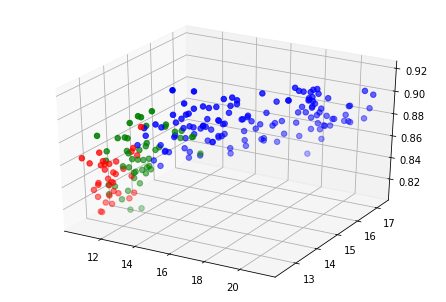

In [155]:
# colores para separar los clusters
colores=['red','green','blue','cyan','yellow']
asignar=[]
# para cada instancia, el color perteneciente a su cluster
for row in labels:
    asignar.append(colores[row])
#3d grafica 

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data.iloc[:, 0], data.iloc[:, 1], data.iloc[:, 2], c=asignar,s=30)

# 6.- Elbow y silhouette